# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow

# Importing Library

In [23]:
from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2

# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [ ]:
!pip install roboflow



from roboflow import Roboflow

rf = Roboflow(api_key=RF_TOKEN)

project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")

version = project.version(6)

dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-6 in yolov8:: 100%|██████████| 7850/7850 [00:00<00:00, 8320.26it/s]


# Training the Model

In [6]:
from ultralytics import YOLO



# Load YOLOv8 model

model = YOLO('yolov8s.pt')



# Train on custom dataset

model.train(data='/kaggle/working/Flower-Disease-6/data.yaml', epochs=100, imgsz=640, batch=64, lr0 = 0.01)

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Flower-Disease-6/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Flower-Disease-6/train/labels... 3646 images, 6 backgrounds, 0 corrupt: 100%|██████████| 3646/3646 [00:03<00:00, 1050.27it/s]


train: New cache created: /kaggle/working/Flower-Disease-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 17109. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Flower-Disease-6/valid/labels... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<00:00, 1101.89it/s]

val: New cache created: /kaggle/working/Flower-Disease-6/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.2G       1.41      2.649      1.629        623        640: 100%|██████████| 57/57 [00:54<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all        272       1135      0.365      0.548      0.381      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.2G      1.233      1.418      1.424        465        640: 100%|██████████| 57/57 [00:56<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        272       1135      0.371      0.299      0.286       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.2G      1.217      1.318      1.408        555        640: 100%|██████████| 57/57 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135        0.4      0.479      0.381      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.3G      1.214      1.264       1.41        564        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        272       1135      0.436       0.54      0.478      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.6G      1.175      1.175      1.377        515        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.462      0.473      0.408      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.3G      1.143       1.11      1.355        513        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.442      0.541      0.391       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        15G      1.119      1.061      1.348        537        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.514      0.606      0.517       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.4G      1.103      1.006      1.331        529        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.614      0.651      0.639      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.5G      1.086      0.969      1.324        512        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.529      0.568      0.566      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      15.3G      1.068     0.9406      1.311        457        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.661      0.634      0.661      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.3G      1.051     0.9153        1.3        533        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.656      0.568      0.645      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      15.6G       1.03     0.8821      1.285        503        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.675      0.633      0.671      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      15.4G       1.02     0.8647      1.282        442        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.623      0.622      0.629      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      15.3G      1.013     0.8331      1.275        468        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.613      0.556      0.595      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.3G      1.015     0.8226      1.273        492        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.481      0.604      0.478      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.2G      1.012     0.8052      1.273        562        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.571       0.58      0.585      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.3G     0.9796     0.7733      1.247        585        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.547      0.591       0.54       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      15.3G     0.9737     0.7639      1.247        530        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135       0.64      0.644      0.635      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.2G     0.9686     0.7508      1.241        553        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.548      0.623      0.582      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.6G     0.9464      0.725      1.228        531        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.643      0.629       0.64      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      15.6G     0.9367     0.7111      1.214        497        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        272       1135      0.638      0.638      0.647      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      15.5G     0.9342     0.7178      1.219        521        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.639      0.579       0.62      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.8G     0.9229     0.6846      1.207        538        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.494      0.597      0.565      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.8G     0.9057     0.6766        1.2        525        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.704      0.619      0.657      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      15.1G     0.8977     0.6622      1.198        603        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.636      0.694      0.697       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      15.6G     0.8942     0.6584      1.187        542        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.645      0.675      0.662      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.2G     0.8916      0.648      1.191        563        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.634      0.668      0.677      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      15.1G     0.8737     0.6355      1.182        523        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.751       0.66      0.716      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.1G     0.8737     0.6286      1.179        498        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135        0.6      0.627      0.608      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.5G     0.8659     0.6232      1.173        559        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.717      0.636      0.686      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      15.2G      0.862     0.6186      1.171        504        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.598      0.604      0.602       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      15.5G     0.8445     0.5907      1.152        469        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.713        0.6      0.678      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.1G     0.8439     0.6027      1.163        606        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.729      0.673      0.712      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.8G     0.8378     0.5952      1.153        523        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        272       1135      0.666       0.64      0.653       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.9G     0.8217     0.5726       1.15        526        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        272       1135      0.733      0.597       0.68      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.1G     0.8195      0.576       1.15        569        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.659      0.736      0.705      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.2G     0.8131     0.5679      1.144        546        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.754      0.658      0.721      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        14G      0.803     0.5632      1.139        504        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135       0.73      0.666      0.714      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      15.2G     0.7911      0.546      1.127        559        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        272       1135      0.711      0.645      0.685      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.7G      0.787      0.549      1.125        549        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        272       1135      0.671      0.594      0.636      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.5G     0.7896     0.5392      1.131        540        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.665      0.605      0.624      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.3G     0.7741     0.5359      1.118        626        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135       0.71      0.645       0.68      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.3G      0.781     0.5363      1.118        529        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.672      0.614      0.663      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.7G     0.7693     0.5318      1.112        632        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.706      0.669      0.712      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        14G      0.767     0.5246      1.111        508        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.712      0.678      0.701      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.3G     0.7485     0.5149      1.105        423        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.663      0.649      0.667      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.9G     0.7517     0.5109      1.106        474        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.662      0.697      0.695      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.5G     0.7427     0.5025      1.102        506        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.676      0.675      0.683      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      15.4G      0.738     0.5004      1.098        546        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.677      0.697      0.716      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.3G     0.7338     0.4977       1.09        595        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.701      0.626      0.666      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.9G     0.7248     0.4937       1.09        605        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.659      0.579      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.5G     0.7247     0.4891      1.093        555        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        272       1135      0.679      0.697       0.71      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      15.4G     0.7199     0.4877      1.088        512        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.667      0.641      0.656       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      15.6G     0.7129      0.479       1.08        564        640:  93%|█████████▎| 53/57 [00:53<00:04,  1.01s/it]

     54/100      15.6G     0.7135     0.4801      1.079        526        640: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.655      0.645      0.686      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.7G     0.7132     0.4776      1.083        456        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.797      0.603      0.698      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.9G     0.6943     0.4662       1.08        541        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.696      0.646      0.674      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.4G     0.7025     0.4654      1.072        559        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        272       1135       0.69      0.617      0.687      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.4G     0.6922     0.4641      1.074        515        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.732      0.678      0.681       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.9G     0.6838     0.4612      1.069        530        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.752      0.628      0.696      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.4G     0.6803     0.4528      1.064        432        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.735      0.686      0.701      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      15.6G     0.6734     0.4473      1.064        625        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135       0.69      0.646      0.672      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.6G     0.6723     0.4438      1.061        625        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.703       0.63      0.666      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        14G     0.6628     0.4409      1.055        519        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all        272       1135      0.691      0.682      0.693      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.9G     0.6642     0.4286      1.048        565        640:  39%|███▊      | 22/57 [00:22<00:35,  1.01s/it]

     64/100      14.9G     0.6615     0.4349      1.048        510        640: 100%|██████████| 57/57 [01:06<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.754      0.624      0.679      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      15.1G      0.659     0.4354      1.055        611        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135      0.681      0.702      0.702      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.5G     0.6549     0.4358       1.05        442        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.646      0.677      0.665      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.9G     0.6512     0.4295      1.044        698        640:  26%|██▋       | 15/57 [00:15<00:43,  1.03s/it]

     67/100      15.6G     0.6548     0.4301      1.047        534        640: 100%|██████████| 57/57 [01:04<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.762      0.663      0.703      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      15.5G      0.638     0.4198      1.037        484        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all        272       1135       0.66      0.635       0.66      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        15G     0.6374     0.4208      1.046        544        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        272       1135       0.72      0.654      0.697      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.8G     0.6297     0.4172      1.039        582        640:  51%|█████     | 29/57 [00:29<00:27,  1.00it/s]

     70/100      15.6G     0.6335     0.4145      1.039        613        640: 100%|██████████| 57/57 [01:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.754      0.645       0.71      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      15.3G     0.6319     0.4112       1.04        595        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.767      0.663      0.712      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      15.3G     0.6237     0.4071      1.034        558        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.723      0.674      0.709      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      15.6G     0.6194     0.4059       1.03        592        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.768       0.67      0.724      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        15G     0.6228     0.4069      1.032        513        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.701      0.695      0.704      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.1G     0.6126     0.3991      1.028        487        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135       0.67      0.718      0.727      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.5G     0.6148     0.3951      1.024        616        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        272       1135      0.737      0.669      0.706      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.6G     0.6076     0.3963      1.025        580        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.749      0.687      0.724       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.8G     0.6035     0.3901      1.024        490        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.751      0.692      0.731      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.6G     0.5977     0.3896      1.022        534        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.681      0.674      0.698      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      15.6G     0.5972     0.3887      1.018        562        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.723      0.699      0.733      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.5G      0.597      0.389       1.02        579        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.706      0.724      0.731      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      15.6G      0.591     0.3824      1.019        599        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.737      0.679       0.71      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      15.4G     0.5814     0.3775      1.009        486        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.729      0.662      0.706      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      15.4G     0.5919     0.3838      1.017        549        640:  51%|█████     | 29/57 [00:29<00:28,  1.03s/it]

     84/100      15.3G     0.5861     0.3776      1.014        446        640: 100%|██████████| 57/57 [01:07<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.748      0.668      0.716      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      15.3G     0.5813     0.3743      1.016        620        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        272       1135      0.721       0.71       0.73      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      15.3G     0.5784     0.3738       1.01        548        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.727      0.704      0.722      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      15.5G     0.5656     0.3651      1.003        522        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.756      0.666      0.722      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      15.4G     0.5631     0.3641      1.003        533        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all        272       1135      0.724      0.697      0.723      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      15.3G     0.5687     0.3662      1.005        637        640: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.724      0.688      0.719       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      15.2G     0.5579     0.3623      1.002        504        640: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.688      0.724      0.719      0.518


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        15G     0.5122     0.2892     0.9579        290        640: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.728      0.701      0.706      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      15.2G     0.4801     0.2595     0.9431        277        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135      0.731      0.671      0.715      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        15G     0.4733      0.258     0.9418        318        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        272       1135      0.768      0.651      0.717      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      15.2G     0.4736     0.2567     0.9442        353        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.777      0.677      0.731      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.6G     0.4629     0.2509     0.9371        242        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        272       1135       0.74      0.672      0.716      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      15.1G     0.4589     0.2461     0.9377        296        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.784      0.644      0.721      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        15G     0.4544     0.2437      0.933        275        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.752      0.681      0.726      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      15.2G     0.4551     0.2456     0.9297        270        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135      0.788      0.634      0.721      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      15.2G     0.4495     0.2427      0.929        279        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        272       1135       0.75      0.667      0.728      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      15.1G     0.4447     0.2407      0.927        313        640: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        272       1135      0.786      0.647      0.727      0.528



100 epochs completed in 1.693 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


                   all        272       1135       0.78      0.677      0.731      0.528
            black-spot        200        532      0.834      0.805      0.858      0.613
          downy-mildew         39        106      0.863        0.5      0.644      0.487
               healthy        167        497      0.644      0.726      0.692      0.485
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7efd155ae500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# Evaluating the Model

In [7]:
# Evaluate the model

metrics = model.val(data='/kaggle/working/Flower-Disease-6/data.yaml')



# Print the evaluation metrics

print(metrics)



# Access specific metrics

print(f"mAP@0.5: {metrics.box.map50}")

print(f"mAP@0.5:0.95: {metrics.box.map}")

# ... other metrics



# Visualize the results using the plot method

results = model.val(data='/kaggle/working/Flower-Disease-6/data.yaml',plots=True)

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /kaggle/working/Flower-Disease-6/valid/labels.cache... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


                   all        272       1135       0.78      0.677       0.73      0.528
            black-spot        200        532      0.834      0.805      0.858      0.613
          downy-mildew         39        106      0.862        0.5      0.643      0.486
               healthy        167        497      0.643      0.726       0.69      0.484
Speed: 0.2ms preprocess, 9.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7efd15078460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,  

val: Scanning /kaggle/working/Flower-Disease-6/valid/labels.cache... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


                   all        272       1135       0.78      0.677       0.73      0.528
            black-spot        200        532      0.834      0.805      0.858      0.613
          downy-mildew         39        106      0.862        0.5      0.643      0.486
               healthy        167        497      0.643      0.726       0.69      0.484
Speed: 0.7ms preprocess, 9.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train23


# Testing the Model

In [13]:
!wget https://i0.wp.com/discoverandshare.org/wp-content/uploads/2023/01/Orchid_Show_Tom_Incrocci347-1.jpg -O orchid.jpg

--2024-12-04 11:23:09--  https://i0.wp.com/discoverandshare.org/wp-content/uploads/2023/01/Orchid_Show_Tom_Incrocci347-1.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279927 (273K) [image/jpeg]
Saving to: 'orchid.jpg'

orchid.jpg          100%[===================>] 273.37K  --.-KB/s    in 0.09s   

2024-12-04 11:23:09 (2.83 MB/s) - 'orchid.jpg' saved [279927/279927]




image 1/1 /kaggle/working/orchid.jpg: 480x640 3 orchids, 52.7ms
Speed: 4.4ms preprocess, 52.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([6., 6., 6.], device='cuda:0')
conf: tensor([0.9562, 0.9099, 0.8661], device='cuda:0')
data: tensor([[142.1392, 123.5177, 343.2808, 332.2611,   0.9562,   6.0000],
        [315.3195, 233.2157, 459.5789, 355.0634,   0.9099,   6.0000],
        [315.6255, 136.2242, 459.5337, 355.2672,   0.8661,   6.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (450, 600)
shape: torch.Size([3, 6])
xywh: tensor([[242.7100, 227.8894, 201.1416, 208.7435],
        [387.4492, 294.1395, 144.2594, 121.8477],
        [387.5796, 245.7457, 143.9082, 219.0429]], device='cuda:0')
xywhn: tensor([[0.4045, 0.5064, 0.3352, 0.4639],
        [0.6457, 0.6536, 0.2404, 0.2708],
        [0.6460, 0.5461, 0.2398, 0.4868]], device='cuda:0')
xyxy: tenso

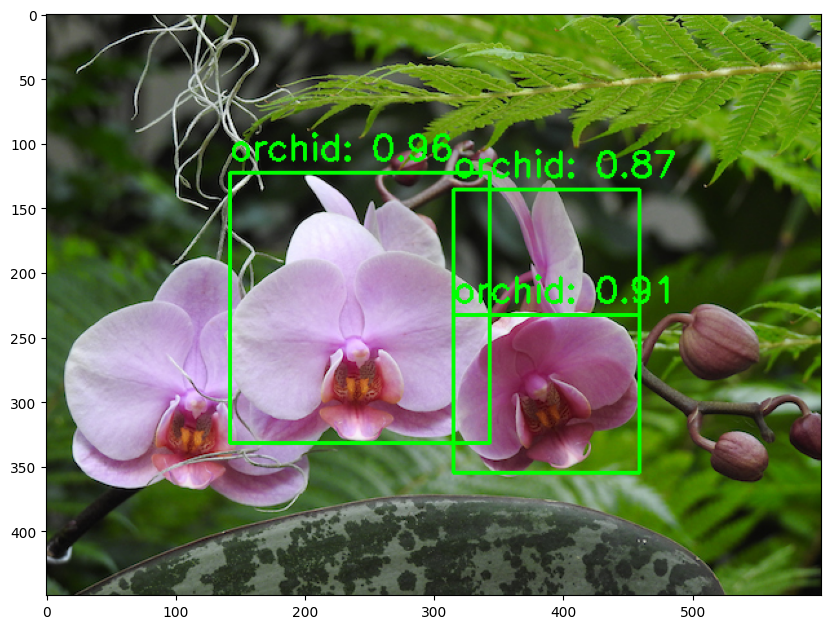

In [15]:
# Load the trained model. Replace with the actual path to your trained weights.

model_path = '/kaggle/working/runs/detect/train2/weights/best.pt' # Update with the correct path to your trained weights

model = YOLO(model_path)



# Testing the Model

test_path = '/kaggle/working/orchid.jpg'

results = model.predict(source=test_path, save=True, conf=0.25)



# Print the bounding boxes, confidence scores, and class names.

for r in results:

    print(r.boxes) # Print bounding box information

    print(r.boxes.conf) # Print confidence scores

    print(r.boxes.cls) # Print predicted classes



# Display the image with bounding boxes



img = cv2.imread(test_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format



for r in results:

    for box in r.boxes:

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        conf = box.conf[0]

        cls = int(box.cls[0])

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes

        text = f"{model.names[cls]}: {conf:.2f}"

        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)



plt.figure(figsize=(10, 10))

plt.imshow(img)

plt.show()

# Saving the Model for Deployment

In [ ]:
#from google.colab import files

# Using the TF.js format

In [19]:
! pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.10.1 requires cubinlinker, which is not installed.
cudf 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.10.1 requires libcudf==24.10.*, which is not installed.
cudf 24.10.1 requires ptxcompiler, which is not installed.
cuml 24.10.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 24.10.0 requires cuvs==24.10.*, which is not installed.
cuml 24.10.0 requires nvidia-cublas, which is not installed.
cuml 24.10.0 requires nvidia-cufft, which is not installed.
cuml 24.

In [30]:
model.export(format='tfjs')

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.42...
ONNX: export success ✅ 1.6s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (42.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733312840.717162     117 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733312840.717200     117 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733312843.540360     117 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733312843.540398     117 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 17.8s, saved as '/kaggle/working/runs/detect/train2/weights/best_saved_model' (106.7 MB)

TensorFlow GraphDef: starting export with tensorflow 2.16.1...
TensorFlow GraphDef: export success ✅ 6.0s, saved as '/kaggle/working/runs/detect/train2/weights/best.pb' (42.7 MB)

TensorFlow.js: starting export with tensorflowjs 4.22.0...

TensorFlow.js: output node names: Identity:0
TensorFlow.js: running 'tensorflowjs_converter --input_format=tf_frozen_model  --output_node_names=Identity:0 "/kaggle/working/runs/detect/train2/weights/best.pb" "/kaggle/working/runs/detect/train2/weights/best_web_model"'
weight model_24/tf.strided_slice_39/ones_like/tensor with shape (3,) and dtype int64 was auto converted to the type int32
weight model_24/tf.strided_slice_39/StridedSlice/end with shape (3,) and dtype int64 was auto converted to the type int32
weight model_24/tf.strided_slice_39/ones_like with shape (3,) and dtype int64 was auto converted to the type int32
we

'/kaggle/working/runs/detect/train2/weights/best_web_model'

## Using the TFLite format

In [25]:
model.export(format='tflite')

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 260.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 313.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 275.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 304.4 MB/s eta 0

100%|██████████| 1.11M/1.11M [00:00<00:00, 21.4MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 51.24file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.42...
ONNX: export success ✅ 22.4s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733312447.656750     117 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733312447.656813     117 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733312450.298329     117 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733312450.298364     117 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 66.1s, saved as '/kaggle/working/runs/detect/train2/weights/best_saved_model' (106.9 MB)

TensorFlow Lite: starting export with tensorflow 2.16.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite' (42.7 MB)

Export complete (68.0s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/Flower-Disease-6/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite'

In [28]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [ ]:
model.save('florys.pt')

In [ ]:
files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [31]:
model.export(format='onnx')

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.42...
ONNX: export success ✅ 1.8s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (42.7 MB)

Export complete (2.5s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train2/weights/best.onnx imgsz=640 data=/kaggle/working/Flower-Disease-6/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train2/weights/best.onnx'

In [ ]:
files.download('/content/runs/detect/train2/weights/best.onnx')